# **Name** 	Muhammad Fahad	                      **Registration no:**	FA23-BSE-208		


# **Medical Insurance Cost Prediction System**

# Imparting Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew , norm , probplot, chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading Dataset (Dataset is picked from Kaggle)

In [8]:
insuranceDataset = pd.read_csv('insurance.csv')
insuranceDataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Understanding Dataset

In [6]:
insuranceDataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
insuranceDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insuranceDataset.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# Checking Missing Values

In [12]:
print('Age: ' ,insuranceDataset['age'].isnull().sum())
print('Sex: ' ,insuranceDataset['sex'].isnull().sum())
print('Bmi: ' ,insuranceDataset['bmi'].isnull().sum())
print('Children: ' ,insuranceDataset['children'].isnull().sum())
print('Smoker: ' ,insuranceDataset['smoker'].isnull().sum())
print('Region: ' ,insuranceDataset['region'].isnull().sum())
print('Charges: ' ,insuranceDataset['charges'].isnull().sum())

Age:  0
Sex:  0
Bmi:  0
Children:  0
Smoker:  0
Region:  0
Charges:  0


# Scenario Heading No: 1
### Scenario Description:
We are working on a medical insurance cost prediction dataset. It contains a numeric age column which represents the age of individuals. To ensure data quality and model reliability, we want to handle any potential future missing values by applying Median Implementation to the age column.

### Technique Name:
Median Imputation

### Variables:
age (non-null int64)

### Logical Description to choose the technique:
Median is chosen because it is robust against outliers and provides a reliable central value for replacing missing ages without being skewed by extreme values.

### Python Script:

In [ ]:
medianAge = insuranceDataset['age'].median()
print('Median of age column: ' , medianAge)
print()

# Assuming we have missing values in age
insuranceDataset['age'] = insuranceDataset['age'].fillna(medianAge)

print('After median implementation: ')
insuranceDataset.head()

Median of age column:  39.0
After median implementation: 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Visualization

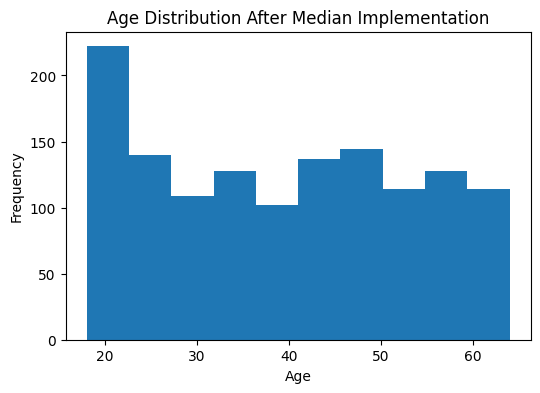

In [21]:
plt.figure(figsize=(6,4))
plt.hist(insuranceDataset['age'] ,  bins= 10)
plt.title('Age Distribution After Median Implementation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Scenario Heading No: 2
### Scenario Description:
In our medical insurance cost prediction dataset, the bmi column is a continuous numeric attribute representing body mass index. To reduce noise and smooth minor variations in the data, we want to apply Binning with Mean Smoothing using 3 bins. This helps in stabilizing the bmi values while preserving meaningful trends.

### Technique Name:
Binning + Mean Smoothing (3 Bins)

### Variables:
bmi (float64, continuous numeric)

### Logical Description to choose the technique:
Binning with smoothing is applied to reduce noise in continuous data. Using 3 bins divides the bmi values into Low, Medium, and High ranges. Replacing each value with the mean of its bin smooths fluctuations while retaining the overall data distribution and trend.

### Python Script:


In [29]:
insuranceDataset['bmiBin'] = pd.cut(insuranceDataset['bmi'] , bins= 3 , labels=['Low', 'Medium', 'High'])

insuranceDataset['bmiSmoothed'] = insuranceDataset.groupby('bmiBin' , observed= True)['bmi'].transform('mean')
insuranceDataset[['bmi' , 'bmiBin' , 'bmiSmoothed']].head()

,bmi,bmiBin,bmiSmoothed
0,27.900,Low,24.553546
1,33.770,Medium,33.446301
2,33.000,Medium,33.446301
3,22.705,Low,24.553546
4,28.880,Medium,33.446301


# Visualization

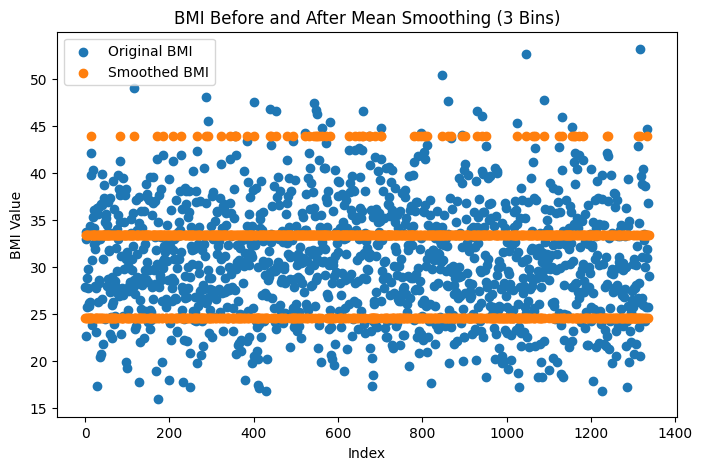

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(insuranceDataset.index , insuranceDataset['bmi'] , label= 'Original BMI')
plt.scatter(insuranceDataset.index , insuranceDataset['bmiSmoothed'] , label= 'Smoothed BMI')

# We can also create a histogram by uncommenting
# plt.hist(insuranceDataset[['bmi' , 'bmiSmoothed']])
plt.title("BMI Before and After Mean Smoothing (3 Bins)")
plt.xlabel("Index")
plt.ylabel("BMI Value")
plt.legend()
plt.show()

# Scenario Heading No: 3
### Scenario Description:
Our medical insurance dataset contains 1338 records. To reduce dataset size while preserving meaningful patterns for faster computation, we will apply Numerosity Reduction using Random Sampling to extract a representative subset of the data.

### Technique Name:
Random Sampling (Numerosity Reduction)

### Variables:
Entire dataset — all columns considered

### Logical Description to choose the technique:
Random Sampling is used because our dataset has a large number of records (1338), and reducing it to a smaller representative subset helps in faster testing and model experimentation. 

### Python Script:


In [9]:
insuranceDatasetSampled = insuranceDataset.sample(frac= 0.3 , random_state= 42)

print('Original Dataset: ' , insuranceDataset.shape)
print()
print('Sampled Dataset: ' , insuranceDatasetSampled.shape)
print()

insuranceDatasetSampled

Original Dataset:  (1338, 7)

Sampled Dataset:  (401, 7)



,age,sex,bmi,children,smoker,region,charges
764,45,female,25.175,2,no,northeast,9095.06825
887,36,female,30.020,0,no,northwest,5272.17580
890,64,female,26.885,0,yes,northwest,29330.98315
1293,46,male,25.745,3,no,northwest,9301.89355
259,19,male,31.920,0,yes,northwest,33750.29180
...,...,...,...,...,...,...,...
260,58,female,25.200,0,no,southwest,11837.16000
701,50,female,44.745,0,no,northeast,9541.69555
672,36,male,29.700,0,no,southeast,4399.73100
1163,18,female,28.215,0,no,northeast,2200.83085


# Visualization

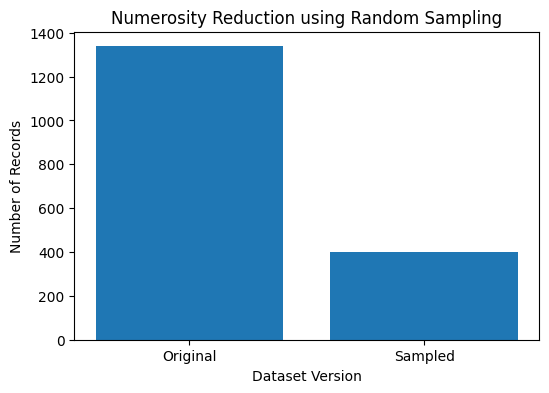

In [10]:
plt.figure(figsize= (6,4))
plt.bar(['Original', 'Sampled'], [len(insuranceDataset), len(insuranceDatasetSampled)])
plt.title("Numerosity Reduction using Random Sampling")
plt.xlabel("Dataset Version")
plt.ylabel("Number of Records")
plt.show()

# Scenario Heading No: 4
### Scenario Description:
In the medical insurance dataset, the charges column represents the medical cost billed to each individual. To understand how widely the insurance charges vary among people, we want to measure the spread of this numeric variable.

### Technique Name:
Variance (Measure of Variability)

### Variables:
charges (float, continuous numeric)

### Logical Description to choose the technique:
Variance is used to measure how much the insurance charges differ from the average cost. Since charges vary greatly between smokers, non-smokers, and different age groups, variance helps us understand the overall risk fluctuation in the dataset.

### Python Script:

In [50]:
chargesVariation = insuranceDataset['charges'].var()
chargesMean = insuranceDataset['charges'].mean()

print('Charges mean: ' , chargesMean)
print('Spreadness in charges: ' , chargesVariation)

# The value of variance is high it means that some have low medical charges and some have too high, so there is a great spread from mean

Charges mean:  13270.422265141257
Spreadness in charges:  146652372.15285498


# Visualization

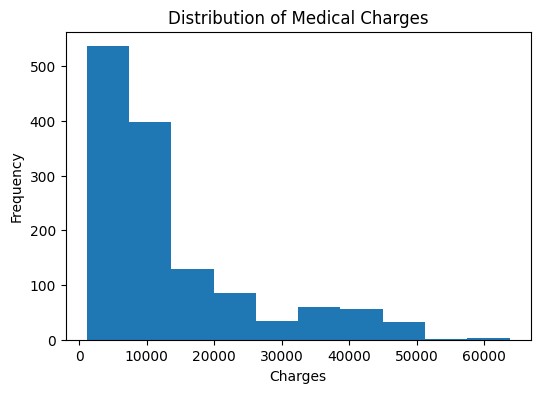

In [49]:
plt.figure(figsize=(6,4))
plt.hist(insuranceDataset['charges'] , bins=10)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

# Scenario Heading No: 5

### Scenario Description:  
In the medical insurance dataset, the age column represents the age of each individual. To understand how the ages of insurance are distributed and detect any unusual values, we calculate quartiles and the interquartile range (IQR).

### Technique Name:  
Quartiles and Interquartile Range (IQR)

### Variables:  
age (integer, continuous numeric)

### Logical Description to choose the technique:  
Quartiles divide the age data into four equal parts, while IQR captures the spread of the middle 50% of ages. This helps identify which age group is more likely to have insurance

### Python Script:

In [55]:
Q1 = insuranceDataset['age'].quantile(0.25)
Q2 = insuranceDataset['age'].quantile(0.50) 
Q3 = insuranceDataset['age'].quantile(0.75)

IQR = Q3 - Q1

print('First quantile: ' , Q1)
print('Second quantile: ' , Q2)
print('Third quantile: ' , Q3)
print('Inter quartile range: ' , IQR)

First quantile:  27.0
Second quantile:  39.0
Third quantile:  51.0
Inter quartile range:  24.0


# Visualization

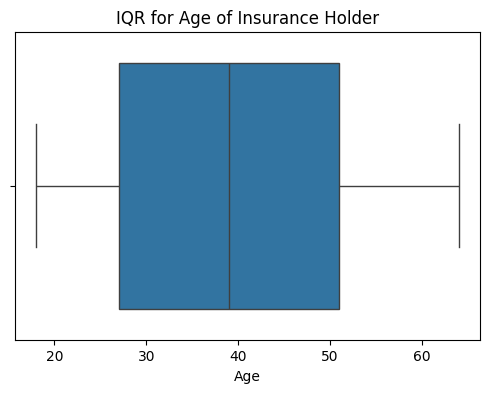

In [56]:
plt.figure(figsize= (6,4))
sns.boxplot(x = insuranceDataset['age'])
plt.title('IQR for Age of Insurance Holder')
plt.xlabel('Age')
plt.show()

# Scenario Heading No: 6

### Scenario Description:  
In the medical insurance dataset, the charges column represents the medical cost billed to each individual. To understand whether the distribution of charges is symmetric or skewed, we calculate the skewness of the data.

### Technique Name:  
Skewness (Measure of Shape)

### Variables:  
charges (float, continuous numeric)

### Logical Description to choose the technique:  
We apply skewness to determine the asymmetry of the charges distribution. A high skew indicates the presence of extreme values (outliers) which can affect model performance. Understanding skewness helps in deciding whether data transformation is needed for better predictive modeling.

### Python Script:

In [61]:
chargesSkewness = insuranceDataset['charges'].skew()
print("Skewness of charges:", chargesSkewness)

Skewness of charges: 1.5158796580240388


# Visualization

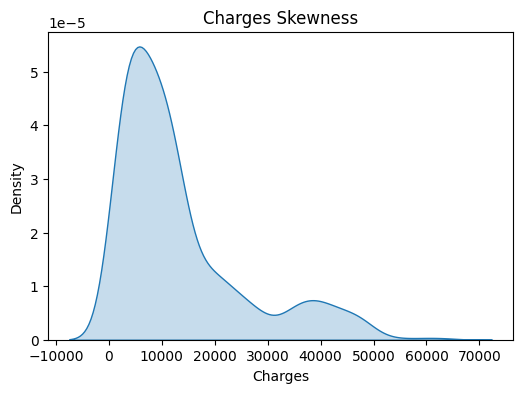

In [66]:
plt.figure(figsize=(6,4))
sns.kdeplot(insuranceDataset['charges'] , fill= True )
plt.title("Charges Skewness")
plt.xlabel("Charges")
plt.ylabel("Density")
plt.show()

# Scenario Heading No: 7

### Scenario Description:  
In the medical insurance dataset, we want to check if there is a relationship between a policyholder's age and whether they are a smoker. This can help identify patterns that may affect insurance charges.

### Technique Name:  
Correlation (Measure of Relationship)

### Variables:  
age (integer, continuous numeric)  
smoker (categorical: yes/no → encoded as 1/0)

### Logical Description to choose the technique:  
We calculate correlation to quantify the strength and direction of the relationship between age and smoking status. Understanding this relationship helps in feature selection for predictive modeling and detecting risk factors for higher insurance charges.

### Python Script:

In [69]:
# First we will encode smoke attribute yes/no = 1/0
# We will do it in hot encoding
# For the time being we will create a new column

insuranceDataset['smokerEncoded'] = insuranceDataset['smoker'].map({'yes': 1 , 'no' :0})
smokingAndAgeCorrelation = insuranceDataset['age'].corr(insuranceDataset['smokerEncoded'])

print('Correlation between age and smoking: ' , smokingAndAgeCorrelation)


Correlation between age and smoking:  -0.025018751536285088


# Visualizatio

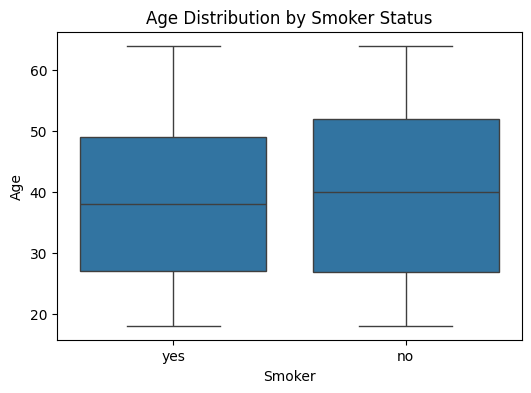

In [81]:

plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='age', data=insuranceDataset)
plt.title("Age Distribution by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Age")
plt.show()


# Scenario Heading No: 8

### Scenario Description:  
We want to group insurance holders based on age, BMI, number of children, and charges to find similar profiles in the insurance dataset.

### Technique Name:  
K-Means Clustering

### Variables:  
age, bmi, children, charges

### Logical Description to choose the technique:  
K-Means clustering helps segment insurance holders into groups with similar characteristics. This allows the insurer to identify high-risk clusters, customize plans, and understand patterns in the data.

### Python Script:

In [85]:
features = insuranceDataset[['age' , 'bmi' , 'children' , 'charges']]

scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(features)

kmean = KMeans(n_clusters= 3 , random_state= 42)
clusters = kmean.fit_predict(scaledFeatures)

insuranceDataset['clusters'] = clusters

insuranceDataset

,age,sex,bmi,children,smoker,region,charges,bmiBin,bmiSmoothed,smokerEncoded,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Low,24.553546,1,0
1,18,male,33.770,1,no,southeast,1725.55230,Medium,33.446301,0,0
2,28,male,33.000,3,no,southeast,4449.46200,Medium,33.446301,0,2
3,33,male,22.705,0,no,northwest,21984.47061,Low,24.553546,0,0
4,32,male,28.880,0,no,northwest,3866.85520,Medium,33.446301,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Medium,33.446301,0,2
1334,18,female,31.920,0,no,northeast,2205.98080,Medium,33.446301,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,Medium,33.446301,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,Low,24.553546,0,0


# Visualization

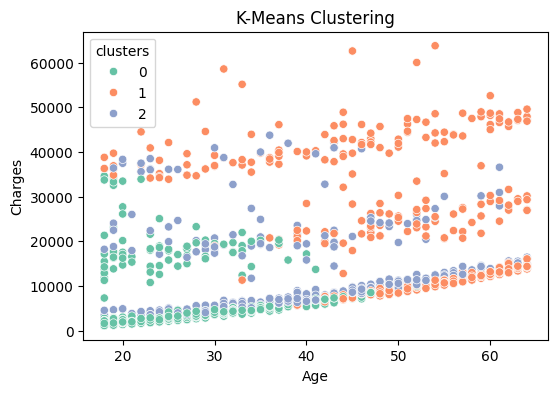

In [96]:
plt.figure(figsize=(6,4))
sns.scatterplot(x= 'age', y= 'charges', hue= 'clusters', palette= 'Set2', data= insuranceDataset)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Scenario Heading No: 9

### Scenario Description:  
In the medical insurance dataset, we want to check if the distribution of medical charges follows a normal distribution. This helps in understanding data behavior and deciding if transformations are needed before modeling.

### Technique Name:  
Normal (Gaussian) Distribution

### Variables:  
charges (float, continuous numeric)

### Logical Description to choose the technique:  
We apply normal distribution analysis to see if charges are symmetrically distributed. If the data is close to normal, certain statistical models (like linear regression) work better. Identifying deviations from normality helps in applying transformations to improve model accuracy.

### Python Script and Visualization:

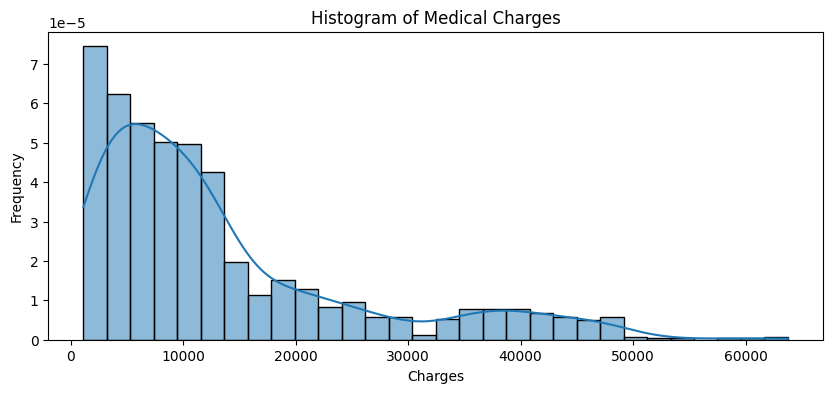

In [ ]:
plt.figure(figsize= (10,4))
sns.histplot(insuranceDataset['charges'] , bins= 30 , stat= 'density' , kde= True)
plt.title('Histogram of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show() 




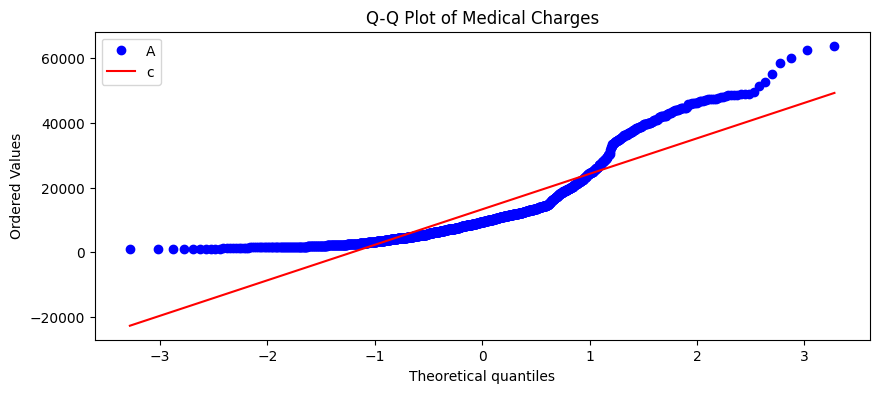

In [102]:
plt.figure(figsize= (10 , 4))
probplot(insuranceDataset['charges'] , dist= 'norm' , plot= plt)
plt.title('Q-Q Plot of Medical Charges')
plt.legend('Actual values vs Theoratical Values')
plt.show()

# Scenario Heading No: 10

### Scenario Description:  
In the medical insurance dataset, we want to estimate the average medical charges and determine a range in which the true mean is likely to lie. This helps understand expected costs for policyholders.

### Technique Name:  
Interval Estimation (Confidence Interval)

### Variables:  
charges (float, continuous numeric)

### Logical Description to choose the technique:  
We apply interval estimation to provide a range (confidence interval) for the average charges. This gives a more informative insight than a single point estimate, helping insurers anticipate expected costs and plan policies accordingly.

### Python Script:

In [104]:
chargesMean = insuranceDataset['charges'].mean()
chargesStd = insuranceDataset['charges'].std()
lenght = len(insuranceDataset)

confidenceInterval = 0.95
z_score = stats.norm.ppf(0.95)
marginOfError = z_score * (chargesStd /np.sqrt(lenght))


lowerBoundary = chargesMean - marginOfError 
upperBoundary = chargesMean + marginOfError 

print('Sample mean: ' , chargesMean)
print('95 percent confidence interval: ' , lowerBoundary , upperBoundary)

Sample mean:  13270.422265141257
95 percent confidence interval:  12725.864762144516 13814.979768137997


# Visualization

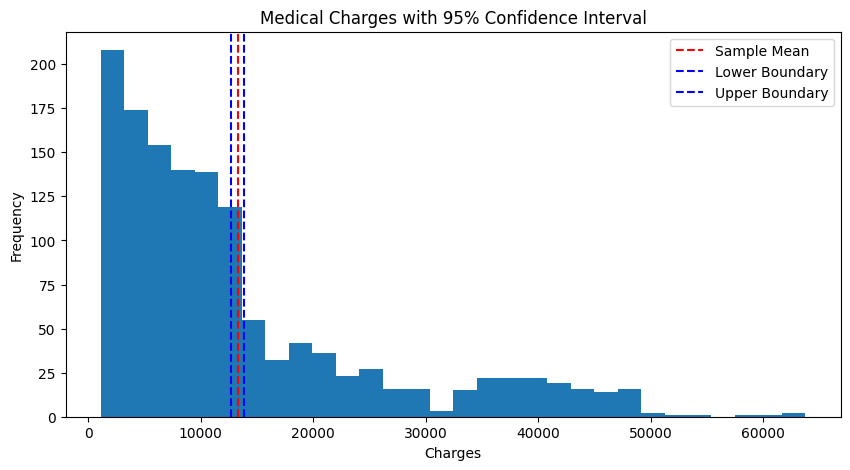

In [111]:
plt.figure(figsize=(10,5))
plt.hist(insuranceDataset['charges'], bins=30)
plt.axvline(chargesMean , color= 'red' , linestyle= '--' , label= 'Sample Mean')
plt.axvline(lowerBoundary , color= 'blue' , linestyle= '--' , label= 'Lower Boundary')
plt.axvline(upperBoundary , color= 'blue' , linestyle= '--' , label= 'Upper Boundary')
plt.title('Medical Charges with 95% Confidence Interval')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Scenario Heading No: 11

### Scenario Description:  
In the medical insurance dataset, we want to test whether a insurance holders smoking status is related to the region they live in. This helps identify patterns in categorical variables affecting insurance costs.

### Technique Name:  
Chi-Square Test of Independence

### Variables:  
smoker (categorical: yes/no)  
region (categorical: northeast, northwest, southeast, southwest)

### Logical Description to choose the technique:  
We apply the Chi-Square Test to check if smoking status and region are independent. This helps insurers understand regional risk patterns and decide if smoking prevalence varies by region, which can impact policy pricing.

### Python Script:

In [120]:
contingencyTable = pd.crosstab(insuranceDataset['smoker'] , insuranceDataset['region'])
print('Contingency table: ' , contingencyTable)

chi2 , p ,dof ,expected = chi2_contingency(contingencyTable)
expectedDf = pd.DataFrame(expected , index= contingencyTable.index , columns= contingencyTable.columns)

print('Chi-Square Value: ' , chi2)
print('Degree of Freedom: ' , dof)
print('P-Value: ' , p)

# Interpretaion
if(p < 0.05):
    print('Reject null hypothesis: Smoking Status and Region are dependant on each other')
else:
    print('Failed to reject null hypothesis: Smoking Status and Region are independant on each other')

Contingency table:  region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58
Chi-Square Value:  7.34347776140707
Degree of Freedom:  3
P-Value:  0.06171954839170547
Failed to reject null hypothesis: Smoking Status and Region are independant on each other


# Visualization

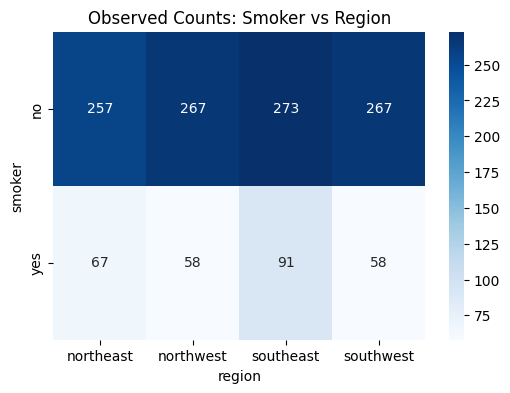

In [125]:
plt.figure(figsize=(6,4))
sns.heatmap(contingencyTable , annot= True , fmt= 'd' , cmap= 'Blues')
plt.title("Observed Counts: Smoker vs Region")
plt.show()



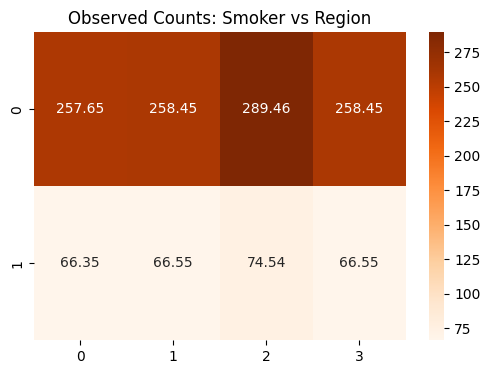

In [126]:
plt.figure(figsize=(6,4))
sns.heatmap(expected , annot= True , fmt= '0.2f' , cmap= 'Oranges')
plt.title("Observed Counts: Smoker vs Region")
plt.show()

# Scenario Heading No: 12

### Scenario Description:  
In the medical insurance dataset, numeric features like age, bmi, children, and charges are on different scales. To make these features comparable for modeling, we apply Z-Score standardization.

### Technique Name:  
Z-Score Standardization

### Variables:  
age, bmi, children, charges (numeric features)

### Logical Description to choose the technique:  
We apply Z-Score standardization to center features around zero with a standard deviation of one. This ensures that all numeric features contribute equally to models like regression and clustering, preventing dominance of features with larger scales.

### Python Script:

In [134]:
numericFeatures = ['age' , 'bmi' , 'charges' , 'children']

scaledDataset = insuranceDataset.copy()
scaler = StandardScaler()
scaledDataset[numericFeatures] = scaler.fit_transform(insuranceDataset[numericFeatures])

print(insuranceDataset.head())
print()
print(scaledDataset.head())



   age     sex     bmi  children smoker     region      charges  bmiBin  \
0   19  female  27.900         0    yes  southwest  16884.92400     Low   
1   18    male  33.770         1     no  southeast   1725.55230  Medium   
2   28    male  33.000         3     no  southeast   4449.46200  Medium   
3   33    male  22.705         0     no  northwest  21984.47061     Low   
4   32    male  28.880         0     no  northwest   3866.85520  Medium   

   bmiSmoothed  smokerEncoded  clusters  
0    24.553546              1         0  
1    33.446301              0         0  
2    33.446301              0         2  
3    24.553546              0         0  
4    33.446301              0         0  

        age     sex       bmi  children smoker     region   charges  bmiBin  \
0 -1.438764  female -0.453320 -0.908614    yes  southwest  0.298584     Low   
1 -1.509965    male  0.509621 -0.078767     no  southeast -0.953689  Medium   
2 -0.797954    male  0.383307  1.580926     no  southeast -

# Visualization

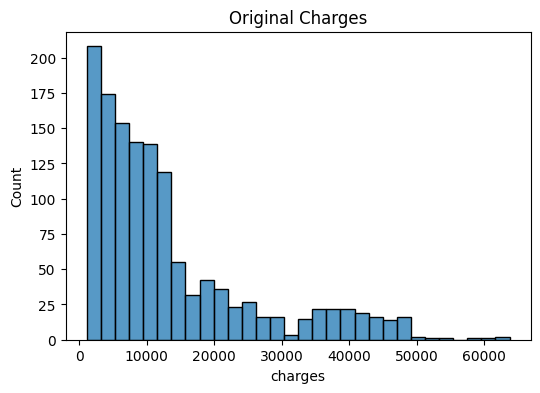

In [136]:
plt.figure(figsize= (6,4))
sns.histplot(insuranceDataset['charges'], bins=30)
plt.title('Original Charges')
plt.show()

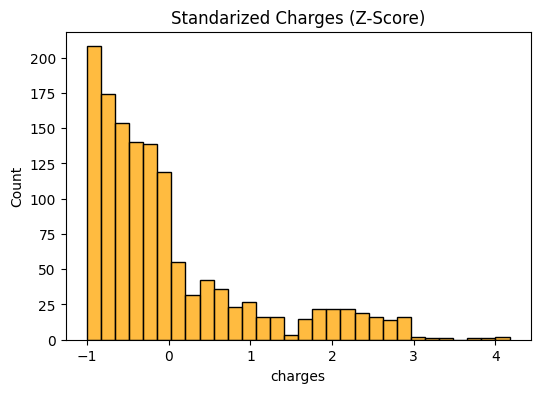

In [139]:
plt.figure(figsize= (6,4))
sns.histplot(scaledDataset['charges'], bins=30 , color= 'Orange')
plt.title('Standarized Charges (Z-Score)')
plt.show()

# Scenario Heading No: 13

### Scenario Description:  
In the medical insurance dataset, categorical variables like sex, smoker, and region need to be converted into numerical format so that machine learning models can use them effectively.

### Technique Name:  
One-Hot Encoding

### Variables:  
sex, smoker, region (categorical variables)

### Logical Description to choose the technique:  
We apply One-Hot Encoding to convert categorical variables into binary columns without introducing any ordinal relationship. This allows models like regression, decision trees, and clustering to process categorical data accurately.

### Python Script:

In [140]:
encodedDataset = pd.get_dummies(insuranceDataset , columns= ['sex' , 'smoker' , 'region'] , drop_first= True)
encodedDataset.head()

,age,bmi,children,charges,bmiBin,bmiSmoothed,smokerEncoded,clusters,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,Low,24.553546,1,0,False,True,False,False,True
1,18,33.770,1,1725.55230,Medium,33.446301,0,0,True,False,False,True,False
2,28,33.000,3,4449.46200,Medium,33.446301,0,2,True,False,False,True,False
3,33,22.705,0,21984.47061,Low,24.553546,0,0,True,False,True,False,False
4,32,28.880,0,3866.85520,Medium,33.446301,0,0,True,False,True,False,False


# Visualization

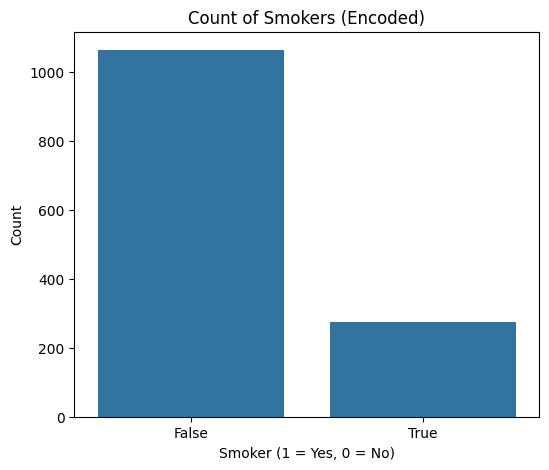

In [146]:
plt.figure(figsize=(6,5))
sns.countplot(x= 'smoker_yes' , data= encodedDataset)
plt.title('Count of Smokers (Encoded)')
plt.xlabel('Smoker (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Scenario Heading No: 14

### Scenario Description:  
In the medical insurance dataset, the charges column is heavily right-skewed. To reduce skewness and make the data more suitable for regression models, we apply a log transformation.

### Technique Name:  
Log Transformation

### Variables:  
charges (float, continuous numeric)

### Logical Description to choose the technique:  
We apply log transformation to compress the range of high values, reduce skewness, and stabilize variance. This improves model performance and ensures predictions are not dominated by extreme charges.

### Python Script:

In [147]:
insuranceDataset['logCharges'] = np.log1p(insuranceDataset['charges'])
insuranceDataset.head()

,age,sex,bmi,children,smoker,region,charges,bmiBin,bmiSmoothed,smokerEncoded,clusters,logCharges
0,19,female,27.900,0,yes,southwest,16884.92400,Low,24.553546,1,0,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,Medium,33.446301,0,0,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,Medium,33.446301,0,2,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,Low,24.553546,0,0,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,Medium,33.446301,0,0,8.260455


# Visualization

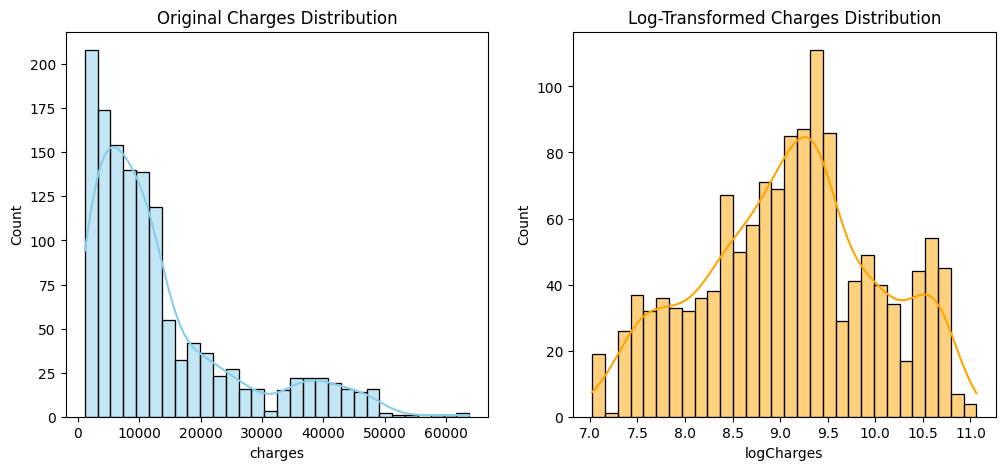

In [151]:
plt.figure(figsize= (12,5))

plt.subplot(1 ,2 ,1)
sns.histplot(insuranceDataset['charges'], bins=30, color='skyblue', kde=True)
plt.title('Original Charges Distribution')

plt.subplot(1 ,2 ,2)
sns.histplot(insuranceDataset['logCharges'], bins=30, color='orange', kde=True)
plt.title('Log-Transformed Charges Distribution')
plt.show()

# Scenario Heading No: 15

### Scenario Description:  
In the medical insurance dataset, we have multiple numeric features like age, bmi, children, and charges. To reduce dimensionality and remove redundancy, we apply PCA.

### Technique Name:  
Principal Component Analysis (PCA)

### Variables:  
age, bmi, children, charges (numeric features)

### Logical Description to choose the technique:  
We apply PCA to transform correlated numeric features into fewer uncorrelated components while preserving maximum variance. This simplifies modeling, reduces noise, and speeds up computation without losing important information.

### Python Script and Visualization:

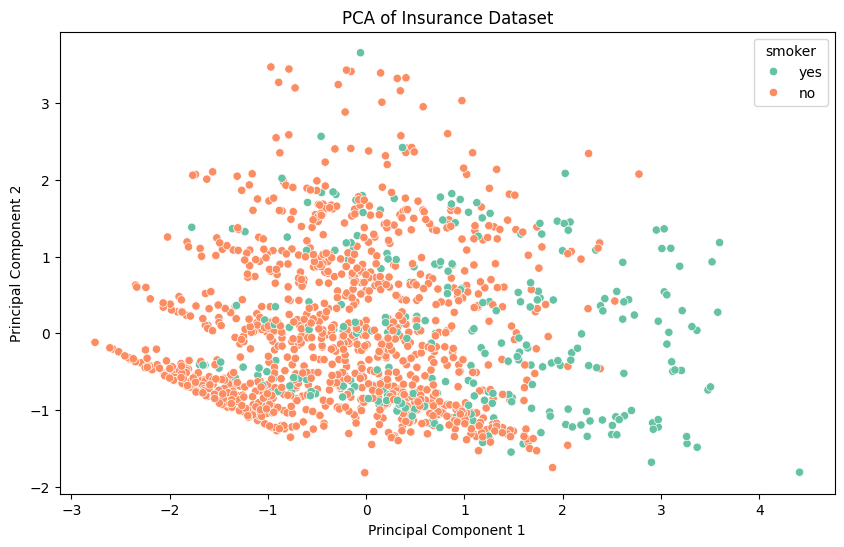

In [157]:
# We aleady made Scaled Dataset in Z-Standarization(Scenario Heading 12)
# We will use the same Scaled Dataset

pca = PCA(n_components= 2)
principalComponents = pca.fit_transform(scaledFeatures)

pcaDataset = pd.DataFrame(data= principalComponents , columns= ['PCA1' , 'PCA2'])
pcaDataset['smoker'] = insuranceDataset['smoker']

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='smoker', data=pcaDataset, palette='Set2')
plt.title('PCA of Insurance Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Scenario Heading No: 16

### Scenario Description:  
In the medical insurance dataset, we want to select the most relevant features that are strongly related to the target variable charges to improve model performance and reduce redundancy.

### Technique Name:  
Feature Selection - Correlation Based (Filter Method)

### Variables:  
age, bmi, children, sex, smoker, region (independent variables)  
charges (target variable)

### Logical Description to choose the technique:  
We use correlation-based feature selection to identify features that have a strong relationship with the target variable. This helps reduce irrelevant or redundant features, improving model accuracy and training efficiency.

### Python Script:

In [168]:
# We have already encoded our dataset in Scenario Heading 13
# We will use the same encoded dataset

for col in encodedDataset.columns:
    if (encodedDataset[col].dtype == 'bool'):
        encodedDataset[col] = encodedDataset[col].astype(int)
        
numericDataset = encodedDataset.select_dtypes(include= ['int64' , 'float64'])

correlationMatrix = numericDataset.corr()

targetedCorrelation = correlationMatrix['charges'].sort_values(ascending= False)
targetedCorrelation

charges             1.000000
smokerEncoded       0.787251
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
bmiSmoothed         0.161022
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64

# Visualization

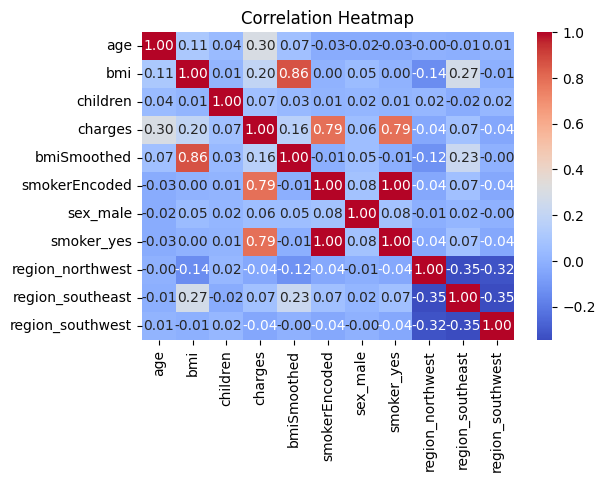

In [170]:
plt.figure(figsize= (6,4))
sns.heatmap(correlationMatrix , annot= True , cmap= 'coolwarm' , fmt= '0.2f')
plt.title('Correlation Heatmap')
plt.show()